In [41]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import stats
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import math

# from sklearn.model_selection import StratifiedKFold


# Problem 01


### Reading iris dataset

In [2]:
df1 = pd.read_csv("iris.csv")
df1.columns = ['sepal_length', 'sepal_width', 'petal_length' ,'petal_width','Class_label']
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,Class_label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df1['Class_label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Using Label Encoder to encode Class_label into Label_type

In [4]:
labelencoder = LabelEncoder()
df1['Label_type'] = labelencoder.fit_transform(df1['Class_label'])

df1.head()

,sepal_length,sepal_width,petal_length,petal_width,Class_label,Label_type
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


In [5]:
# del df['Class_label']

In [6]:
df1['Label_type'].value_counts()

1    50
2    50
0    49
Name: Label_type, dtype: int64

### (a) Compare all four features distribution in each iris class using boxplots.


Text(0.5, 1.0, 'Sepal length distribution based on class label')

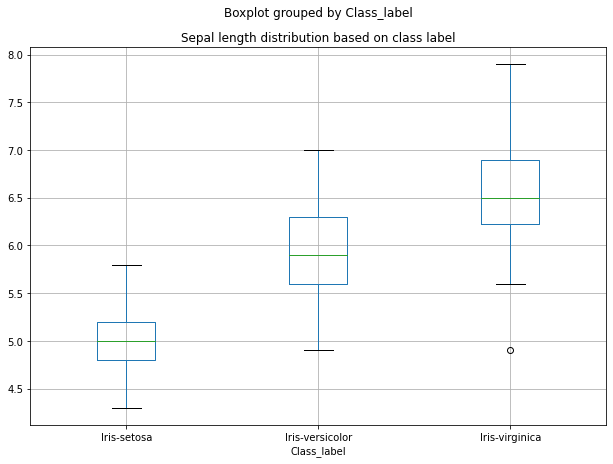

In [7]:
# data = df1[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

df1.boxplot(column = ['sepal_length'], by ='Class_label',figsize = (10, 7))
plt.title("Sepal length distribution based on class label")
# plt.figure(figsize = (10, 7))


### The distribution of feature sepal length  increases from iris-setosa to iris-virginica.




Text(0.5, 1.0, 'Sepal width distribution based on class label')

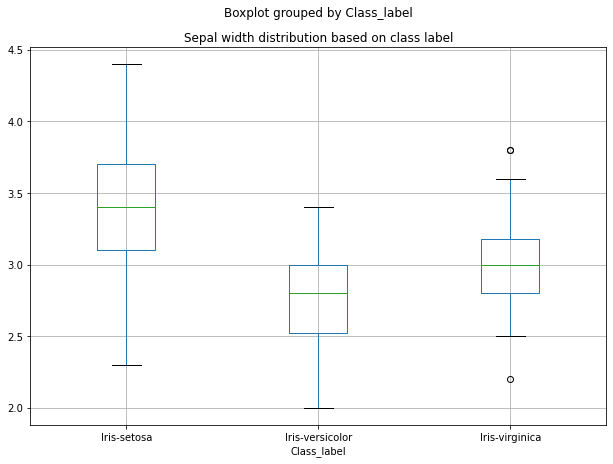

In [8]:
df1.boxplot(column = ['sepal_width'], by ='Class_label',figsize = (10, 7))
plt.title("Sepal width distribution based on class label")


### The distribution of feature sepal width decreases from iris-setosa to iris_versicolor and increments a bit from iris_versicolor to iris_virginica.

Text(0.5, 1.0, 'Petal length distribution based on class label')

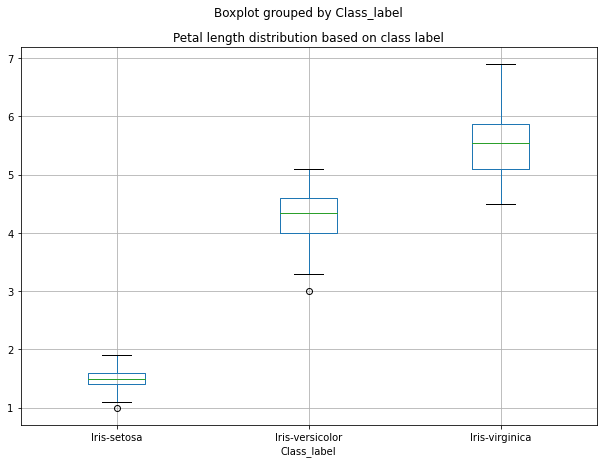

In [9]:
df1.boxplot(column = ['petal_length'], by ='Class_label',figsize = (10, 7))
plt.title("Petal length distribution based on class label")

### The distribution for petal length feature increases from iris-setosa to iris-virginica.

Text(0.5, 1.0, 'Petal width distribution based on class label')

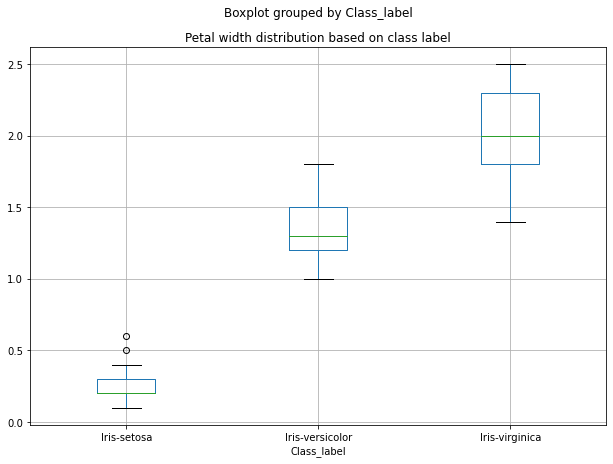

In [10]:
df1.boxplot(column = ['petal_width'], by ='Class_label',figsize = (10, 7))
plt.title("Petal width distribution based on class label")

### The distribution for petal width feature increases from iris-setosa to iris-virginica.

### Dataframe to numpy arrays 

In [11]:
X_iris = df1[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()
Y_iris = df1[['Label_type']].to_numpy()


In [12]:
cmap_light = ListedColormap(['#FBBBB9', '#82CAFF','#52F268',]) 
cmap_bold = ListedColormap(['#CA226B', '#2B65EC','#09B01F']) 
cmap_test = ListedColormap(['#8E35EF', '#659EC7','#D1BE15'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF','#FCEBB1'])

## Functions for calculating K-Nearest Neigbours

In [13]:
def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy

### Calculating Euclidean distance

  Computing the squared distance between each test example and each training example

  Input:
  - X_test: A numpy array of shape (num_test, dim_feat) containing test data
  - X_train: A numpy array of shape (num_train, dim_feat) containing training data

  Output:
  - dists: A numpy array of shape (num_test, num_train) where 
           dist[i, j] is the squared Euclidean distance between 
           the i-th test example and the j-th training example

In [14]:
def my_euclidean_dist(X_test, X_train):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))
 
    a = np.zeros((num_test, 1))
    b = np.zeros((num_train,1))
    for i in range(0, num_test):
        a[i] = sum(pow(X_test[i],2))
    for i in range(0, num_train):
        b[i] = sum(pow(X_train[i],2))
    for i in range(0, num_test):
        for j in range(0, num_train):
            dists[i,j] = a[i] + b[j] - 2 * np.dot(X_test[i], X_train[j])
    return dists


### Defining function to 
### a)find the top k nearest neighbors for each test sample.
### b) retrieve the corresponding labels of those neighbors.


  Inputs:
  - dists: distance matrix of shape (num_test, num_train)
  - Y_train: A numpy array of shape (num_train) containing ground truth labels for training data
  - k: An integer, k nearest neighbors

  Output:
  - neighbors: A numpy array of shape (num_test, k), where each row containts the 
               labels of the k nearest neighbors for each test example
 

In [15]:
def find_k_neighbors(dists, Y_train, k):
    num_test = dists.shape[0]
    neighbors = np.zeros((num_test, k))
    for i in range(0, num_test):
        idx = np.argsort(dists[i])
        neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]
    return neighbors

### Defining KNN predict function to predict labels for test data.

  Inputs:
  - X_test: A numpy array of shape (num_test, dim_feat) containing test data.
  - X_train: A numpy array of shape (num_train, dim_feat) containing training data.
  - Y_train: A numpy array of shape (num_train) containing ground truth labels for training data
  - k: An integer, k nearest neighbors

  Output:
  - Y_pred: A numpy array of shape (num_test). Predicted labels for the test data.
 

In [30]:
def knn_predict(X_test, X_train, Y_train, k):

    num_test = X_test.shape[0]
    dists = my_euclidean_dist(X_test, X_train)
    neighbors = find_k_neighbors(dists, Y_train, k)
    Y_pred = np.zeros(num_test, dtype=int)
    for i in range(0, num_test):
        Y_pred[i] = sum(np.unique(neighbors[i]))
        a,count=np.unique(neighbors[i],return_counts=True)
        Y_pred[i]=a[count.argmax()]
    return Y_pred

### Plotting decision boundary along with confusion matrix and xlassification report  for different values of k

<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]


Value of k :  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.56      0.50      0.53        10
           2       0.55      0.60      0.57        10

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30

[[10  0  0]
 [ 0  5  5]
 [ 0  4  6]]


<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]
<ipython-input-31-b0dbd8e653cc>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Value of k :  2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.80      0.73        10
           2       0.75      0.60      0.67        10

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

[[10  0  0]
 [ 0  8  2]
 [ 0  4  6]]


<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]
<ipython-input-31-b0dbd8e653cc>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Value of k :  4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.58      0.70      0.64        10
           2       0.62      0.50      0.56        10

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30

[[10  0  0]
 [ 0  7  3]
 [ 0  5  5]]


<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]
<ipython-input-31-b0dbd8e653cc>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Value of k :  6
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.80      0.73        10
           2       0.75      0.60      0.67        10

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

[[10  0  0]
 [ 0  8  2]
 [ 0  4  6]]


<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]
<ipython-input-31-b0dbd8e653cc>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Value of k :  10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.62      0.80      0.70        10
           2       0.71      0.50      0.59        10

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.76        30
weighted avg       0.78      0.77      0.76        30

[[10  0  0]
 [ 0  8  2]
 [ 0  5  5]]


<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]
<ipython-input-31-b0dbd8e653cc>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


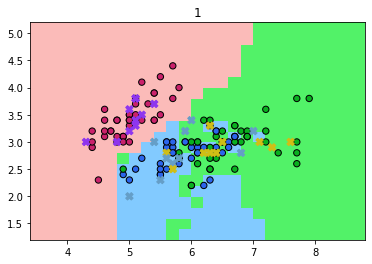

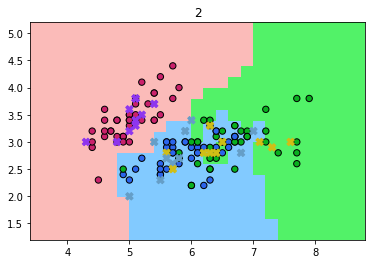

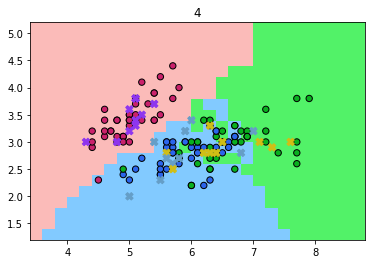

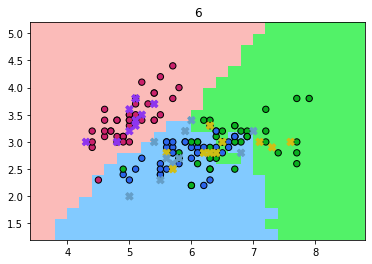

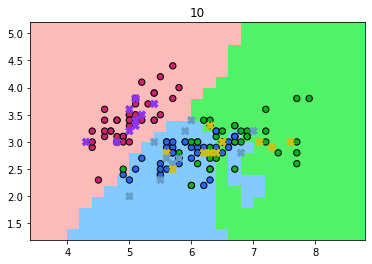

In [31]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(X_iris[:,:2], Y_iris, stratify = Y_iris, test_size = 0.20)
k=1
for k in [1,2,4,6,10]:
    Y_pred = knn_predict(iris_X_test, iris_X_train, iris_y_train, k)
    print("Value of k : ",k)
    print(metrics.classification_report(iris_y_test, Y_pred))
    print(metrics.confusion_matrix(iris_y_test, Y_pred))

    h = 0.2

    x_min, x_max = iris_X_train[:, 0].min() - 1, iris_X_train[:, 0].max() + 1
    y_min, y_max = iris_X_train[:, 1].min() - 1, iris_X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    Z = knn_predict(np.c_[xx.ravel(), yy.ravel()],iris_X_train,iris_y_train,k)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(iris_X_train[:, 0], iris_X_train[:, 1], c= iris_y_train, cmap=cmap_bold,edgecolor='k', s=40)
    plt.scatter(iris_X_test[:, 0],  iris_X_test[:, 1], alpha=1.0,c = iris_y_test, cmap=cmap_test ,linewidth=1, marker='X', s=55)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(k)


## Problem 02

### Reading Bank Notes dataset

In [20]:
df2=pd.read_csv("data_banknote_authentication.csv")
df2.columns =['Variance', 'Skewness', 'Kurtosis' ,'Entropy', 'Class_label']
df2.head()

,Variance,Skewness,Kurtosis,Entropy,Class_label
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### Converting dataframe to numpy arrays

In [23]:
X_bank = df2[['Variance','Skewness','Kurtosis','Entropy']].to_numpy()
Y_bank = df2[['Class_label']].to_numpy()

### Defining function to calculate minkowski distance

In [24]:
def minkoswski_dist(X_test, X_train,p=3):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    a = np.zeros((num_test, 1))
    b = np.zeros((num_train,1))
    for i in range(0, num_test):
        for j in range(0, num_train):
            dists[i,j]=0
            for k in range(4):
                dists[i,j]+=math.pow(abs(X_test[i][k]-X_train[j][k]),p)
            dists[i,j]=math.pow(dists[i,j],1/p)
            
    return dists


### Defining function to calculate manhattan distance

In [25]:
def manhattan_dist(X_test, X_train):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(0, num_test):
        for j in range(0, num_train):
            dists[i,j]=0
            for k in range(4):
                dists[i,j]+=abs(X_test[i][k]-X_train[j][k])
    return dists


### Defining knn_predict function to predict labels using mean instead of majority voting

In [32]:
def knn_predict_mean(X_test, X_train, y_train, k):
    num_test = X_test.shape[0]
    dists = my_euclidean_dist(X_test, X_train)
    neighbors = find_k_neighbors(dists, y_train, k)
    Y_pred = np.zeros(num_test, dtype=int)
    for i in range(0, num_test):
        Y_pred[i] = sum(neighbors[i])//len(neighbors[i])
    print(Y_pred)
    return Y_pred

### Prediction using majority voting : unique()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_bank, Y_bank,stratify = Y_bank, test_size=0.20)
k=2
Y_pred = knn_predict(X_test, X_train, y_train, k)
print(metrics.classification_report(y_test, Y_pred))
print(metrics.confusion_matrix(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[153   0]
 [  0 122]]


<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]


### Prediction using mean

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_bank, Y_bank,stratify=Y_bank, test_size=0.20)
k=2
Y_pred = knn_predict_mean(X_test, X_train, y_train, k)
print(metrics.classification_report(y_test, Y_pred))
print(metrics.confusion_matrix(y_test, Y_pred))



[1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0
 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[152   1]
 [  0 122]]


<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]


## Considering all features, at k=2, there is no difference in the accuracy

### Defining knn_predict function, but calculating distance between test and training exmples using manhattan distance formula

In [35]:
def knn_predict_manhattan(X_test, X_train, y_train, k):

    num_test = X_test.shape[0]
    dists = manhattan_dist(X_test, X_train)
    neighbors = find_k_neighbors(dists, y_train, k)
    Y_pred = np.zeros(num_test, dtype=int)
    for i in range(0, num_test):
        Y_pred[i] = sum(neighbors[i])//len(neighbors[i])
    print(Y_pred)
    return Y_pred

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_bank, Y_bank,stratify=Y_bank, test_size=0.20)
Y_pred = knn_predict_manhattan(X_test, X_train, y_train, 2)
print(metrics.classification_report(y_test, Y_pred))
print(metrics.confusion_matrix(y_test, Y_pred))



[1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0
 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[153   0]
 [  0 122]]


<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]


### Defining knn_predict function, but calculating distance between test and training exmples using minkowski distance formula

In [39]:
def knn_predict_min(X_test, X_train, y_train, k):
    num_test = X_test.shape[0]
    dists = minkoswski_dist(X_test,X_train)
    neighbors = find_k_neighbors(dists, y_train, k)
    Y_pred = np.zeros(num_test, dtype=int)
    for i in range(0, num_test):
        Y_pred[i] = sum(neighbors[i])//len(neighbors[i])
    return Y_pred

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_bank, Y_bank,stratify=Y_bank, test_size=0.20)
Y_pred = knn_predict_min(X_test, X_train, y_train, 2)
print(metrics.classification_report(y_test, Y_pred))
print(metrics.confusion_matrix(y_test, Y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[153   0]
 [  0 122]]


<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]


## Problem 03

### Reading mnist_train and mnist_test files

In [43]:
mnist_train = pd.read_csv("mnist_train.csv",header=None)
mnist_test = pd.read_csv("mnist_test.csv",header=None)

In [44]:
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
mnist_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X_mnist_train = mnist_train.loc[:, mnist_train.columns != 0].to_numpy()
Y_mnist_train = mnist_train.loc[:, mnist_train.columns == 0].to_numpy()
X_mnist_test = mnist_test.loc[:, mnist_test.columns != 0].to_numpy()
Y_mnist_test = mnist_test.loc[:, mnist_test.columns == 0].to_numpy()


In [48]:
training_size = [500,1000,2500,5000,10000]

X_test = X_mnist_test[:1000]
y_test = Y_mnist_test[:1000]
error_rates = []

for i in training_size:
    X_train = X_mnist_train[:i]
    y_train = Y_mnist_train[:i]
    Y_pred = knn_predict(X_test, X_train, y_train, 2)
    print("Value for training size: ",i)
    print(metrics.classification_report(y_test, Y_pred))
    print(metrics.confusion_matrix(y_test, Y_pred))
    acc = accuracy_score(y_test[:1000, -1], Y_pred)
    error_rate = 1 - acc
    error_rates.append(error_rate)

<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]


Value for training size:  500
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        85
           1       0.66      1.00      0.79       126
           2       0.88      0.61      0.72       116
           3       0.74      0.83      0.78       107
           4       0.79      0.86      0.82       110
           5       0.76      0.59      0.66        87
           6       0.88      0.75      0.81        87
           7       0.81      0.78      0.79        99
           8       0.86      0.48      0.62        89
           9       0.73      0.80      0.76        94

    accuracy                           0.77      1000
   macro avg       0.79      0.77      0.77      1000
weighted avg       0.79      0.77      0.77      1000

[[ 82   0   1   0   0   0   2   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  4  27  71   1   1   1   1   5   5   0]
 [  1   9   1  89   0   3   0   1   1   2]
 [  0   2   0   0  95   0   1   1   0  

<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]


Value for training size:  1000
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        85
           1       0.82      1.00      0.90       126
           2       0.87      0.77      0.82       116
           3       0.79      0.79      0.79       107
           4       0.79      0.84      0.81       110
           5       0.76      0.70      0.73        87
           6       0.87      0.87      0.87        87
           7       0.80      0.87      0.83        99
           8       0.92      0.55      0.69        89
           9       0.78      0.74      0.76        94

    accuracy                           0.82      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.82      0.81      1000

[[ 83   0   0   0   1   0   1   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  4  10  89   1   1   1   2   7   1   0]
 [  1   2   4  85   0   8   1   1   3   2]
 [  0   2   0   0  92   0   2   0   0 

<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]


Value for training size:  2500
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        85
           1       0.85      1.00      0.92       126
           2       0.92      0.84      0.88       116
           3       0.85      0.86      0.86       107
           4       0.81      0.91      0.86       110
           5       0.86      0.82      0.84        87
           6       0.93      0.92      0.92        87
           7       0.83      0.90      0.86        99
           8       0.92      0.66      0.77        89
           9       0.90      0.74      0.81        94

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000

[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  2   7  98   1   3   1   0   3   1   0]
 [  0   2   2  92   0   4   1   3   2   1]
 [  0   2   0   0 100   1   0   2   0 

<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]


Value for training size:  5000
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        85
           1       0.86      1.00      0.93       126
           2       0.96      0.84      0.90       116
           3       0.87      0.91      0.89       107
           4       0.87      0.91      0.89       110
           5       0.92      0.90      0.91        87
           6       0.95      0.94      0.95        87
           7       0.86      0.91      0.88        99
           8       0.94      0.71      0.81        89
           9       0.88      0.81      0.84        94

    accuracy                           0.90      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.90      0.90      0.89      1000

[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  3   7  98   1   1   0   1   4   1   0]
 [  0   2   0  97   0   1   1   3   2   1]
 [  0   2   0   0 100   0   1   1   0 

<ipython-input-15-a0f583fe7233>:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  neighbors[i] = [Y_train[idx[ki]] for ki in range (0, k)]


Value for training size:  10000
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        85
           1       0.89      1.00      0.94       126
           2       0.97      0.89      0.93       116
           3       0.86      0.92      0.89       107
           4       0.88      0.92      0.90       110
           5       0.92      0.87      0.89        87
           6       0.97      0.95      0.96        87
           7       0.88      0.92      0.90        99
           8       0.94      0.75      0.84        89
           9       0.91      0.82      0.86        94

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.91      1000
weighted avg       0.91      0.91      0.91      1000

[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  3   3 103   0   1   0   0   5   1   0]
 [  0   1   1  98   0   1   1   2   1   2]
 [  0   2   0   0 101   0   1   0   1

In [49]:
error_rates

[0.22599999999999998,
 0.18300000000000005,
 0.13,
 0.10499999999999998,
 0.09299999999999997]

### Plotting change in classification error with respect to the changing number of training examples

/Users/samruddhi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


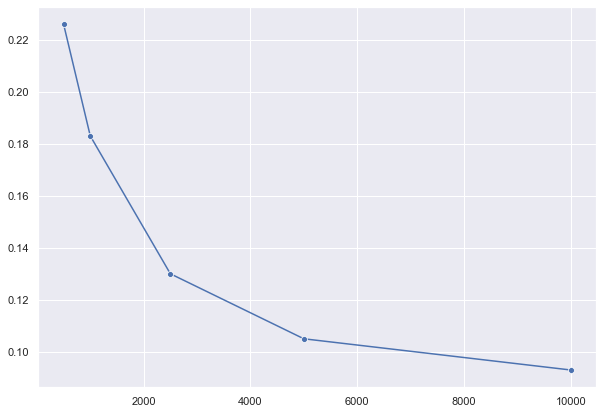

In [50]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
ax = sns.lineplot(training_size, error_rates , marker='o')

## Classification error is the lowest for the traning size 10000, therefore it is considered for the best fit model